# Regularization and Cross-Validation
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement **Ridge Regression** to control overfitting
- implement **Logistic Regression with regularization** to control overfitting 
- implement **Cross-Validation** to control overfitting

In [26]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
digit_train = sio.loadmat('digit_train')
X = digit_train['X']
print(X)
y = digit_train['y']
digit_test = sio.loadmat('digit_test')
X_test = digit_test['X_test']
y_test = digit_test['y_test']

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [28]:
def show_digit(fea):
    plt.rcParams['figure.figsize'] = (10.0, 8.0)
    idx = np.random.permutation(X.shape[1])
    fea = fea[:, idx[:100]]
    faceW = 28
    faceH = 28
    numPerLine = 20
    ShowLine = 4
    Y = np.zeros((faceH * ShowLine, faceW * numPerLine), dtype=np.float)
    for i in range(ShowLine):
        for j in range(numPerLine):
            Y[i * faceH:(i + 1) * faceH, j * faceW:(j + 1) * faceW] = fea[:,i * numPerLine + j].reshape((faceH, faceW))            
    plt.imshow(Y, cmap='gray')

### Ridge Regression and LOOCV

E_train, E_test without reg 0.0 0.10547463586137619
E_train, E_test with reg 0.015 0.0622802611752888


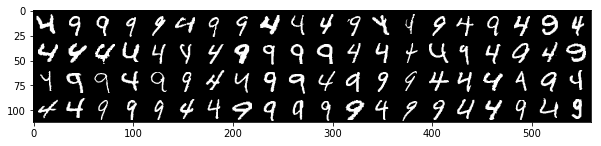

In [46]:
show_digit(X)
# Do feature normalization here
# begin answer
from scipy import stats
x = (X - np.mean(X)) / np.std(X)
# end answer
# Do LOOCV
lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3])
lmbda = 0
E_val_min = float('inf')
from ridge import ridge

# without reg
w = ridge(x, y, lmbda)
# print("w^2 without reg", np.sum(np.matmul(w.T, w)))
# Do feature normalization to X_test, y_test
y_h = np.sign(np.matmul(w.T, np.vstack((np.ones((1, x.shape[1])), x))))
E_train = np.sum(y_h != y) / y.shape[1]

# Do feature normalization to X_test, y_test
x_test = (X_test - np.mean(X_test)) / np.std(X_test)
y_h_test = np.sign(np.matmul(w.T, np.vstack((np.ones((1, x_test.shape[1])), x_test))))
E_test = np.sum(y_h_test != y_test) / y_test.shape[1]
print("E_train, E_test without reg", E_train, E_test)

for i in range(len(lmbdas)):
    E_val = 0
    for j in range(X.shape[1]):
        x_ = np.delete(x, j, axis = 1)  # take point j out of X
        y_ = np.delete(y, j, axis = 1)
        w = ridge(x_, y_, lmbdas[i])
        x_val = x[:, j].reshape(-1, 1)
        y_val = y[:, j]
        y_h = np.sign(np.matmul(w.T, np.vstack((np.ones((1, x_val.shape[1])), x_val))))
        E_val += (y_h[0][0] != y_val[0])
    E_val /= X.shape[1]
    # Update lmbda according validation error
    # begin answer
    print(lmbdas[i], E_val)
    if E_val_min > E_val:
        E_val_min = E_val
        lmbda = lmbdas[i]
    # end answer

lmbda = 1000


# Compute training error
w = ridge(x, y, lmbda)
# print("w^2 with reg", np.sum(np.matmul(w.T, w)))
# Do feature normalization to X_test, y_test
y_h = np.sign(np.matmul(w.T, np.vstack((np.ones((1, x.shape[1])), x))))
E_train = np.sum(y_h != y) / y.shape[1]

# Do feature normalization to X_test, y_test
x_test = (X_test - np.mean(X_test)) / np.std(X_test)
y_h_test = np.sign(np.matmul(w.T, np.vstack((np.ones((1, x_test.shape[1])), x_test))))
E_test = np.sum(y_h_test != y_test) / y_test.shape[1]
print("E_train, E_test with reg", E_train, E_test)
# Compute test error

### Logistic Regression with Regularization
Use the simlimar skeleton code above to implement it.

In [83]:
from logistic_r import logistic_r

x = (X - np.mean(X)) / np.std(X)
# end answer
# Do LOOCV
lmbdas = np.array([1e-3, 1e-2, 1e-1, 0, 1, 1e1, 1e2, 1e3])
lmbda = 0
E_val_min = float('inf')


yy = (y + 1) / 2
# Compute training error
w = logistic_r(x, yy, lmbda)

y_h = np.sign(np.matmul(w.T, np.vstack((np.ones((1, x.shape[1])), x)))*2 - 1)
E_train = np.sum(y_h != y) / y.shape[1]

# Do feature normalization to X_test, y_test
x_test = (X_test - np.mean(X_test)) / np.std(X_test)

y_h_test = np.sign(np.matmul(w.T, np.vstack((np.ones((1, x_test.shape[1])), x_test)))*2 - 1)
E_test = np.sum(y_h_test != y_test) / y_test.shape[1]
print("E_train, E_test without reg", E_train, E_test)

for i in range(len(lmbdas)):
    E_val = 0
    for j in range(X.shape[1]):
        x_ = np.delete(x, j, axis = 1)  # take point j out of X
        y_ = np.delete(y, j, axis = 1)
        yy = (y_ + 1) / 2
        w = logistic_r(x_, yy, lmbdas[i])
        x_val = x[:, j].reshape(-1, 1)
        y_val = y[:, j]
        y_h = np.sign(np.matmul(w.T, np.vstack((np.ones((1, x_val.shape[1])), x_val)))*2 - 1)
        E_val += (y_h[0][0] != y_val[0])
    E_val /= X.shape[1]
    # Update lmbda according validation error
    # begin answer
    print(lmbdas[i], E_val)
    if E_val_min > E_val:
        E_val_min = E_val
        lmbda = lmbdas[i]
    # end answer

lmbda = 10

yy = (y + 1) / 2
# Compute training error
w = logistic_r(x, yy, lmbda)

y_h = np.sign(np.matmul(w.T, np.vstack((np.ones((1, x.shape[1])), x)))*2 - 1)
E_train = np.sum(y_h != y) / y.shape[1]

# Do feature normalization to X_test, y_test
x_test = (X_test - np.mean(X_test)) / np.std(X_test)

y_h_test = np.sign(np.matmul(w.T, np.vstack((np.ones((1, x_test.shape[1])), x_test)))*2 - 1)
E_test = np.sum(y_h_test != y_test) / y_test.shape[1]
print("E_train, E_test with reg", E_train, E_test)
# Compute test error

E_train, E_test without reg 0.0 0.06177800100452034
E_train, E_test with reg 0.0 0.05675539929683576
